# Foundation & Initialization 

In [1]:
import tensorflow as tf

In [2]:
!nvidia-smi

Fri Mar 28 20:59:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!wget https://raw.githubusercontent.com/emreCanIlik/PokeVision-Pok-mon-Classification-with-Deep-Learning/refs/heads/main/helper_functions.py

--2025-03-28 20:59:29--  https://raw.githubusercontent.com/emreCanIlik/PokeVision-Pok-mon-Classification-with-Deep-Learning/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-03-28 20:59:29 (76.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
train_dir = "/kaggle/input/pokemon-dataset-1000/pokemon-dataset-1000/train"
test_dir = "/kaggle/input/pokemon-dataset-1000/pokemon-dataset-1000/test"
val_dir = "/kaggle/input/pokemon-dataset-1000/pokemon-dataset-1000/val"

In [5]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [6]:
def  visualize_pokemon_images(train_dir, num_samples=5):
    
    class_names = os.listdir(train_dir)
    class_names = [d for d in class_names if os.path.isdir(os.path.join(train_dir, d))]
    sampled_images = []
    sampled_labels = []
    image_shapes = []
    
    for _ in range(num_samples):
        
        random_class = random.choice(class_names)
        class_dir = os.path.join(train_dir, random_class)
        image_files = os.listdir(class_dir)
        random_image = random.choice(image_files)
        sampled_images.append(os.path.join(class_dir, random_image))
        sampled_labels.append(random_class)
        img = imread(os.path.join(class_dir, random_image))
        image_shapes.append(img.shape)
    
    
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    
    for i, image_path in enumerate(sampled_images):
        img = imread(image_path)
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(f"{sampled_labels[i]}\nShape: {image_shapes[i]}")
    
    plt.show()

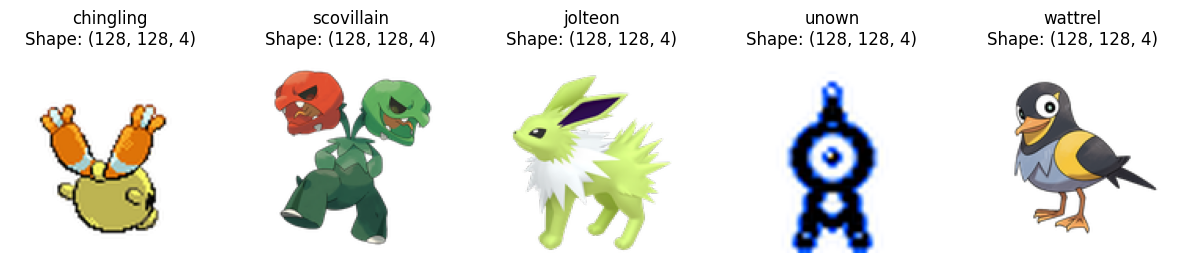

In [7]:
visualize_pokemon_images(train_dir, num_samples=5)

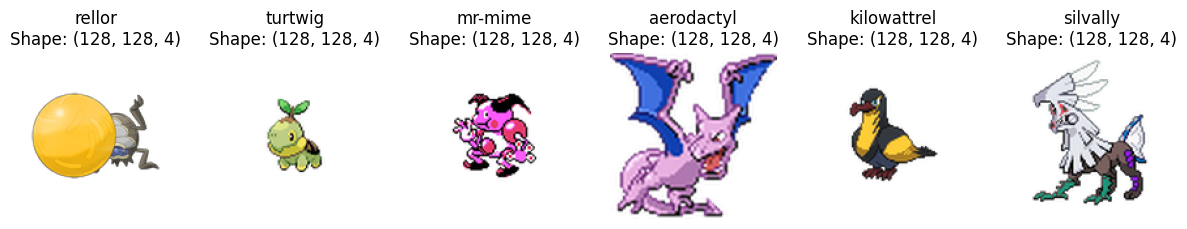

In [8]:
visualize_pokemon_images(train_dir, num_samples=6)

In [9]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [10]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               image_size=IMG_SIZE,
                                                               label_mode="categorical",
                                                               batch_size=BATCH_SIZE)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                                     image_size=IMG_SIZE,
                                                                     label_mode="categorical",
                                                                     batch_size=BATCH_SIZE)


Found 20921 files belonging to 1000 classes.
Found 3239 files belonging to 1000 classes.
Found 2379 files belonging to 898 classes.


In [11]:
images, labels = next(iter(train_data))

In [12]:
print(images[:,2])
labels[:10]

tf.Tensor(
[[[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]], shape=(32, 128, 3), dtype=float32)


<tf.Tensor: shape=(10, 1000), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [13]:
train_data.class_names[:10]

['abomasnow',
 'abra',
 'absol',
 'accelgor',
 'aegislash-shield',
 'aerodactyl',
 'aggron',
 'aipom',
 'alakazam',
 'alcremie']

In [14]:
train_data.class_names[40:50]

['axew',
 'azelf',
 'azumarill',
 'azurill',
 'bagon',
 'baltoy',
 'banette',
 'barbaracle',
 'barboach',
 'barraskewda']

In [15]:
len_classes = len(train_data.class_names)
len_classes

1000

In [16]:
img_shape = images[0].shape
img_shape

TensorShape([128, 128, 3])

# Simple CNN Approach

In [17]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [18]:
class_names_train_data = train_data.class_names
num_train_classes = len(class_names_train_data)
num_train_classes

1000

In [19]:
class_names_validation_data = validation_data.class_names
num_validation_classes = len(class_names_validation_data)
num_validation_classes

898

In [20]:
simple_cnn_model = Sequential([
    tf.keras.Input(shape=(img_shape)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len_classes, activation='softmax')])

In [21]:
simple_cnn_model.compile(loss='categorical_crossentropy',
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['accuracy'])

In [22]:
simple_cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1000)                │          65,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249,480 (974.53 KB)

 Trainable params: 249,480 (974.53 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history_simple = simple_cnn_model.fit(train_data,
                                      epochs=30,
                                      validation_data=test_data,
                                      validation_steps=1,
                                      validation_freq=1)

Epoch 1/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.0026 - loss: 7.0812 - val_accuracy: 0.0000e+00 - val_loss: 6.4246
Epoch 2/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.0262 - loss: 5.8995 - val_accuracy: 0.0938 - val_loss: 5.1646
Epoch 3/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.0841 - loss: 4.9491 - val_accuracy: 0.2188 - val_loss: 4.3955
Epoch 4/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.1660 - loss: 4.2155 - val_accuracy: 0.2188 - val_loss: 4.0374
Epoch 5/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2530 - loss: 3.5995 - val_accuracy: 0.3750 - val_loss: 3.9784
Epoch 6/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.3163 - loss: 3.1684 - val_accuracy: 0.4375 - val_loss: 2.8958
Epoch 7/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.3817 - loss: 2.7985 - val_accuracy: 0.3750 - val_loss: 2.8270
Epoch 8/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4225 - loss: 2.5497 - va

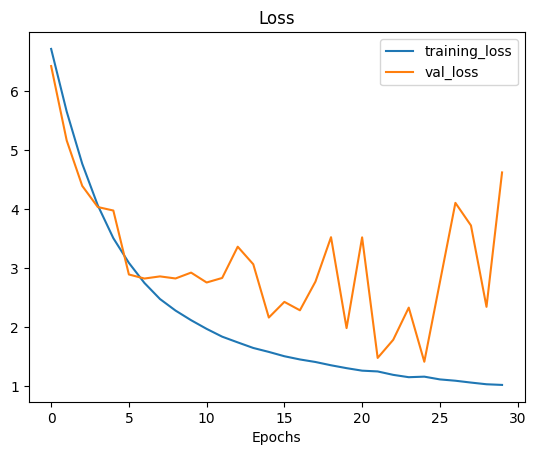

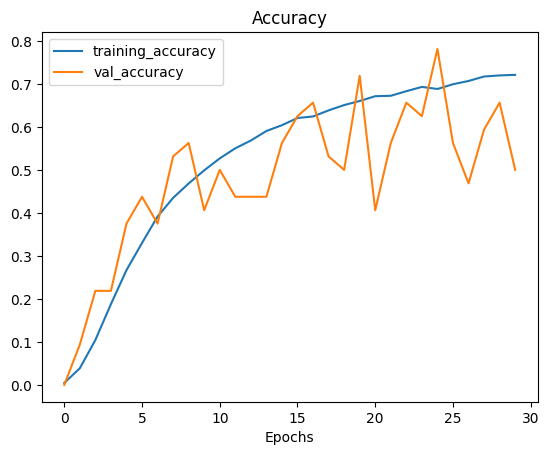

In [24]:
from helper_functions import plot_loss_curves
plot_loss_curves(history_simple)

In [25]:
result_simple_cnn = simple_cnn_model.evaluate(test_data)
result_simple_cnn

102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.6266 - loss: 2.6709


[2.755249500274658, 0.6282803416252136]

# Feature Extraction

In [26]:
basic_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B1(include_top=False)
basic_model.trainable = False
images = tf.keras.layers.Input(shape=img_shape, name="input_layer")
x = basic_model(images)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(1000, activation="softmax", name="output_layer")(x)

28456008/28456008 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
model_effnetb1 = tf.keras.Model(images, outputs)

In [30]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [32]:
model_effnetb1.compile(loss="categorical_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                       metrics=["accuracy"])

In [33]:
model_effnetb1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b1 (Functional)       │ (None, 4, 4, 1280)          │       6,931,124 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1000)                │       1,281,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,212,124 (31.33 MB)

 Trainable params: 1,281,000 (4.89 MB)

 Non-trainable params: 6,931,124 (26.44 MB)

In [34]:
history_effnetb1 = model_effnetb1.fit(train_data,
                               epochs=15,
                               validation_data = test_data,
                               validation_steps=1,
                               validation_freq=1,
                               callbacks=[create_tensorboard_callback("transfer_learning", "feature_extraction")])

Saving TensorBoard log files to: transfer_learning/feature_extraction/20250328-210630
Epoch 1/15
654/654 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.0175 - loss: 6.7195 - val_accuracy: 0.2188 - val_loss: 6.0560
Epoch 2/15
654/654 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.2654 - loss: 5.5505 - val_accuracy: 0.3750 - val_loss: 5.2357
Epoch 3/15
654/654 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.4938 - loss: 4.6836 - val_accuracy: 0.6875 - val_loss: 3.8835
Epoch 4/15
654/654 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.6231 - loss: 3.9399 - val_accuracy: 0.3750 - val_loss: 4.1029
Epoch 5/15
654/654 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7093 - loss: 3.3210 - val_accuracy: 0.5938 - val_loss: 3.2645
Epoch 6/15
654/654 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7600 - loss: 2.8109 - val_accuracy: 0.5625 - val_loss: 3.3716
Epoch 7/15
654/654 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.8037 - loss: 2.4027 - val_accuracy: 0.8438 - val_loss: 2.3203
Epoc

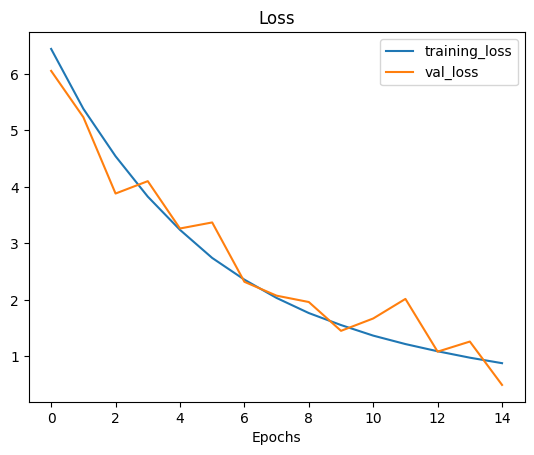

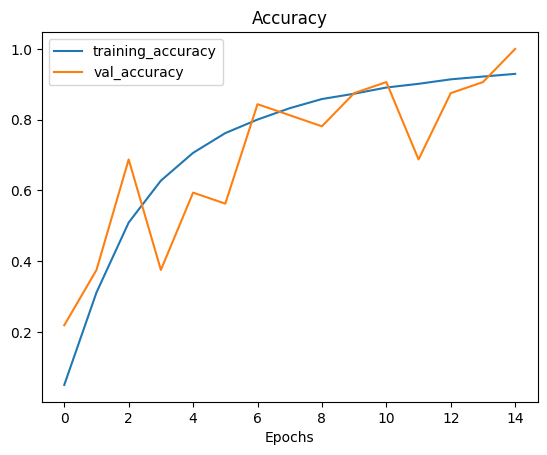

In [35]:
plot_loss_curves(history_effnetb1)

In [36]:
results_effnetb1 = model_effnetb1.evaluate(test_data)
results_effnetb1

102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.8675 - loss: 1.1369


[1.1512712240219116, 0.8592157959938049]

# Data Augmentation

In [37]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [38]:
data_augmentation_layer = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2)], name="data_augmentation")

In [39]:
basic_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B1(include_top=False)
basic_model.trainable = False

images = layers.Input(shape=img_shape, name="input_layer")

x = data_augmentation_layer(images)
x = basic_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(len_classes, activation="softmax", name="output_layer")(x)

In [40]:
model_effnetb1_dataug = tf.keras.Model(images, outputs)

In [41]:
model_effnetb1_dataug.compile(loss="categorical_crossentropy",
                              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                              metrics=["accuracy"])

In [42]:
model_effnetb1_dataug.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b1 (Functional)       │ (None, None, None, 1280)    │       6,931,124 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1000)                │       1,281,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,212,124 (31.33 MB)

 Trainable params: 1,281,000 (4.89 MB)

 Non-trainable params: 6,931,124 (26.44 MB)

In [43]:
# Create checkpoint path
checkpoint_path = "model_with_data_augmentation_weights/checkpoint.weights.h5" 

# Define a ModelCheckpoint callback to save model weights exclusively
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True, 
    save_best_only=True,  
    save_freq="epoch",  
    verbose=1 
)


In [45]:
pretraining_epochs = 15
history_effnetb1_dataug = model_effnetb1_dataug.fit(train_data,
                                                    epochs=pretraining_epochs,
                                                    validation_data=test_data,
                                                    validation_steps=1,
                                                    validation_freq=1,
                                                    callbacks=[create_tensorboard_callback("transfer_learning", "data_augmentation"),checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/data_augmentation/20250328-211058
Epoch 1/15
654/654 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.0841 - loss: 6.1983
Epoch 1: val_loss improved from inf to 3.38271, saving model to model_with_data_augmentation_weights/checkpoint.weights.h5
654/654 ━━━━━━━━━━━━━━━━━━━━ 107s 138ms/step - accuracy: 0.0843 - loss: 6.1969 - val_accuracy: 0.4688 - val_loss: 3.3827
Epoch 2/15
654/654 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4212 - loss: 3.3791
Epoch 2: val_loss improved from 3.38271 to 2.38521, saving model to model_with_data_augmentation_weights/checkpoint.weights.h5
654/654 ━━━━━━━━━━━━━━━━━━━━ 51s 78ms/step - accuracy: 0.4212 - loss: 3.3788 - val_accuracy: 0.5625 - val_loss: 2.3852
Epoch 3/15
654/654 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5757 - loss: 2.3634
Epoch 3: val_loss improved from 2.38521 to 1.14517, saving model to model_with_data_augmentation_weights/checkpoint.weights.h5
654/654 ━━━━━━━━━━━━━━━━━━━━ 40s 61m

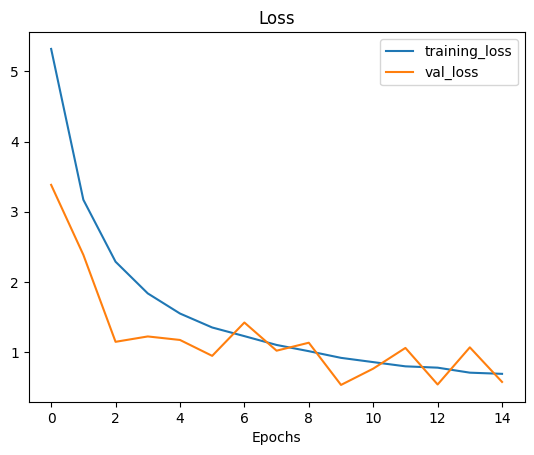

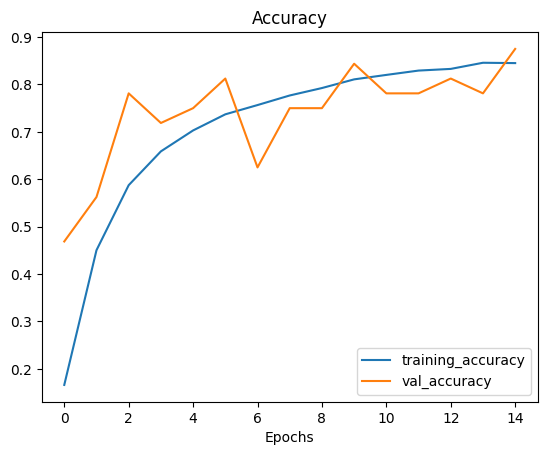

In [46]:
plot_loss_curves(history_effnetb1_dataug)

In [47]:
results_effnet_dataug = model_effnetb1_dataug.evaluate(test_data)
results_effnet_dataug

102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8282 - loss: 0.7946


[0.8004584312438965, 0.8230935335159302]

# Fine Tuning

In [48]:
model_effnetb1_dataug.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation, built=True>,
 <Functional name=efficientnetv2-b1, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling_layer, built=True>,
 <Dense name=output_layer, built=True>]

In [49]:
for layer_number, layer in enumerate(model_effnetb1_dataug.layers):
  print(f"Layer number {layer_number} | Layer name: {layer.name} | trainable status: {layer.trainable}")

Layer number 0 | Layer name: input_layer | trainable status: True
Layer number 1 | Layer name: data_augmentation | trainable status: True
Layer number 2 | Layer name: efficientnetv2-b1 | trainable status: False
Layer number 3 | Layer name: global_average_pooling_layer | trainable status: True
Layer number 4 | Layer name: output_layer | trainable status: True


In [50]:
model_effnetb1_dataug.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b1 (Functional)       │ (None, None, None, 1280)    │       6,931,124 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1000)                │       1,281,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,774,126 (41.10 MB)

 Trainable params: 1,281,000 (4.89 MB)

 Non-trainable params: 6,931,124 (26.44 MB)

 Optimizer params: 2,562,002 (9.77 MB)

In [51]:
for i, layer in enumerate(model_effnetb1_dataug.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_layer_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block1b_project_conv False
10 block1b_project_bn False
11 block1b_project_activation False
12 block1b_drop False
13 block1b_add False
14 block2a_expand_conv False
15 block2a_expand_bn False
16 block2a_expand_activation False
17 block2a_project_conv False
18 block2a_project_bn False
19 block2b_expand_conv False
20 block2b_expand_bn False
21 block2b_expand_activation False
22 block2b_project_conv False
23 block2b_project_bn False
24 block2b_drop False
25 block2b_add False
26 block2c_expand_conv False
27 block2c_expand_bn False
28 block2c_expand_activation False
29 block2c_project_conv False
30 block2c_project_bn False
31 block2c_drop False
32 block2c_add False
33 block3a_expand_conv False
34 block3a_expand_bn False
35 block3a_expand_activation False
36 block3a_project_conv F

In [52]:
print(len(model_effnetb1_dataug.trainable_variables))

2


In [53]:
print(len(model_effnetb1_dataug.layers[2].trainable_variables))

0


In [55]:
model_fine_tune = model_effnetb1_dataug.layers[2]
model_fine_tune.name

'efficientnetv2-b1'

In [56]:
print(len(model_fine_tune.trainable_variables))

0


In [57]:
for layer_number, layer_name in enumerate(model_fine_tune.layers):
  print(layer_number, layer_name, layer_name.trainable)

0 <InputLayer name=input_layer_2, built=True> False
1 <Rescaling name=rescaling_1, built=True> False
2 <Normalization name=normalization_1, built=True> False
3 <Conv2D name=stem_conv, built=True> False
4 <BatchNormalization name=stem_bn, built=True> False
5 <Activation name=stem_activation, built=True> False
6 <Conv2D name=block1a_project_conv, built=True> False
7 <BatchNormalization name=block1a_project_bn, built=True> False
8 <Activation name=block1a_project_activation, built=True> False
9 <Conv2D name=block1b_project_conv, built=True> False
10 <BatchNormalization name=block1b_project_bn, built=True> False
11 <Activation name=block1b_project_activation, built=True> False
12 <Dropout name=block1b_drop, built=True> False
13 <Add name=block1b_add, built=True> False
14 <Conv2D name=block2a_expand_conv, built=True> False
15 <BatchNormalization name=block2a_expand_bn, built=True> False
16 <Activation name=block2a_expand_activation, built=True> False
17 <Conv2D name=block2a_project_conv, bu

In [58]:
# Make all the layers trainable
model_fine_tune.trainable = True

# Freeze all the layers except for the last 10
for layer in model_fine_tune.layers[:-10]:
  layer.trainable = False

In [59]:
model_effnetb1_dataug.compile(loss="categorical_crossentropy",
                              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                              metrics=["accuracy"])

In [60]:
for layer_number, layer in enumerate(model_fine_tune.layers):
  print(f"Layer number {layer_number} | Layer name: {layer.name} | trainable status: {layer.trainable}")

Layer number 0 | Layer name: input_layer_2 | trainable status: False
Layer number 1 | Layer name: rescaling_1 | trainable status: False
Layer number 2 | Layer name: normalization_1 | trainable status: False
Layer number 3 | Layer name: stem_conv | trainable status: False
Layer number 4 | Layer name: stem_bn | trainable status: False
Layer number 5 | Layer name: stem_activation | trainable status: False
Layer number 6 | Layer name: block1a_project_conv | trainable status: False
Layer number 7 | Layer name: block1a_project_bn | trainable status: False
Layer number 8 | Layer name: block1a_project_activation | trainable status: False
Layer number 9 | Layer name: block1b_project_conv | trainable status: False
Layer number 10 | Layer name: block1b_project_bn | trainable status: False
Layer number 11 | Layer name: block1b_project_activation | trainable status: False
Layer number 12 | Layer name: block1b_drop | trainable status: False
Layer number 13 | Layer name: block1b_add | trainable statu

In [61]:
print(len(model_fine_tune.trainable_variables))

10


In [62]:
# Fine tune for another 5 epochs
fine_tuning_epochs = pretraining_epochs + 10

In [63]:
history_fine_tune = model_effnetb1_dataug.fit(train_data,
                                              epochs=fine_tuning_epochs,
                                              initial_epoch=history_effnetb1_dataug.epoch[-1], 
                                              validation_data=test_data,
                                              validation_steps=1,
                                              validation_freq=1,
                                              callbacks=[create_tensorboard_callback("transfer_learning", "fine_tune")])

Saving TensorBoard log files to: transfer_learning/fine_tune/20250328-212917
Epoch 15/25
654/654 ━━━━━━━━━━━━━━━━━━━━ 44s 43ms/step - accuracy: 0.8367 - loss: 0.7593 - val_accuracy: 0.8438 - val_loss: 0.6446
Epoch 16/25
654/654 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.8866 - loss: 0.5213 - val_accuracy: 0.7812 - val_loss: 1.1724
Epoch 17/25
654/654 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9045 - loss: 0.4434 - val_accuracy: 0.8438 - val_loss: 0.6000
Epoch 18/25
654/654 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9142 - loss: 0.3779 - val_accuracy: 0.8750 - val_loss: 0.5804
Epoch 19/25
654/654 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9217 - loss: 0.3442 - val_accuracy: 0.9688 - val_loss: 0.4453
Epoch 20/25
654/654 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9288 - loss: 0.3220 - val_accuracy: 0.9062 - val_loss: 0.2790
Epoch 21/25
654/654 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.9312 - loss: 0.3047 - val_accuracy: 0.9375 - val_loss: 0.3555
Epoch 

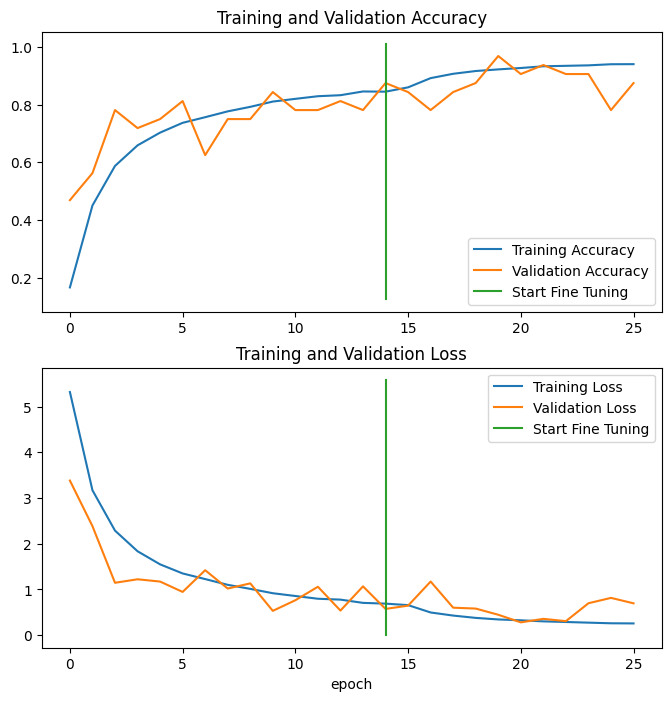

In [67]:
from helper_functions import compare_historys

compare_historys(history_effnetb1_dataug,
                 history_fine_tune,
                 initial_epochs=15)

In [68]:
results_fine_tuned = model_effnetb1_dataug.evaluate(test_data)
results_fine_tuned

102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8862 - loss: 0.5090


[0.4887316823005676, 0.8851497173309326]